In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.1'

In [4]:
keras.__version__

'2.4.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train_full.shape

(60000, 28, 28)

In [7]:
y_train_full.shape

(60000,)

In [8]:
x_train_full.dtype

dtype('uint8')

In [9]:
y_train_full.dtype

dtype('uint8')

In [10]:
x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
layer = []
layer += [keras.layers.Flatten(input_shape=(28, 28))]
for i in range(3):
    if i == 2:
        layer += [keras.layers.Dense(10, activation='softmax')] 
    else:
        layer += [keras.layers.Dense(300, activation='relu')]
model2 = keras.models.Sequential(layer)

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
weight, bias = hidden1.get_weights()

In [19]:
weight.shape

(784, 300)

In [20]:
bias.shape

(300,)

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7192 - accuracy: 0.7665 - val_loss: 0.5005 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4865 - accuracy: 0.8318 - val_loss: 0.4475 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4419 - accuracy: 0.8451 - val_loss: 0.4137 - val_accuracy: 0.8622
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4141 - accuracy: 0.8553 - val_loss: 0.4144 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8610 - val_loss: 0.4526 - val_accuracy: 0.8306
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3788 - accuracy: 0.8666 - val_loss: 0.3734 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3659 - accuracy: 0.8703 - val_loss: 0.3633 - val_accuracy:

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [25]:
history.history

{'loss': [0.7191544771194458,
  0.4864506721496582,
  0.4419199526309967,
  0.41412392258644104,
  0.3949027359485626,
  0.37881579995155334,
  0.36587169766426086,
  0.3530019521713257,
  0.34285035729408264,
  0.33369511365890503,
  0.3250378966331482,
  0.31790533661842346,
  0.30913156270980835,
  0.3030637800693512,
  0.2962428033351898,
  0.29138171672821045,
  0.28431135416030884,
  0.2782234847545624,
  0.27356860041618347,
  0.267943799495697,
  0.2636605501174927,
  0.26004594564437866,
  0.25498202443122864,
  0.25023889541625977,
  0.24561168253421783,
  0.24148671329021454,
  0.2365272045135498,
  0.23364636301994324,
  0.22947964072227478,
  0.22539584338665009],
 'accuracy': [0.7664545178413391,
  0.831818163394928,
  0.845127284526825,
  0.8552727103233337,
  0.8609636425971985,
  0.866563618183136,
  0.8703272938728333,
  0.875,
  0.8773272633552551,
  0.8802727460861206,
  0.8836727142333984,
  0.8862181901931763,
  0.8888909220695496,
  0.8917090892791748,
  0.892509

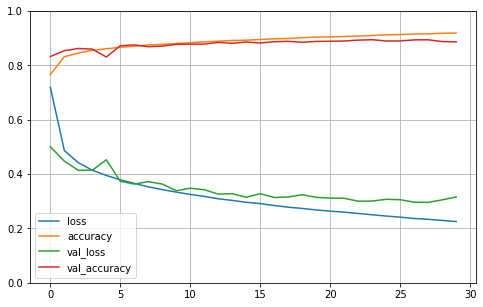

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 883us/step - loss: 0.3466 - accuracy: 0.8735


[0.346558153629303, 0.8734999895095825]

In [28]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
x_train.shape, y_test.shape

((55000, 28, 28), (5160,))

In [30]:
X_train.shape

(11610, 8)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(200, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               1800      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 201       
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='sgd', loss='mse')

In [33]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6645 - val_loss: 1.0767
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4043 - val_loss: 0.8758
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3720 - val_loss: 1.1325
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3653 - val_loss: 2.5315
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3604 - val_loss: 0.5100
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3409 - val_loss: 0.3307
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3321 - val_loss: 0.3290
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3258 - val_loss: 0.4210
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3230 - val_loss: 0.3204
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3193 - val_lo

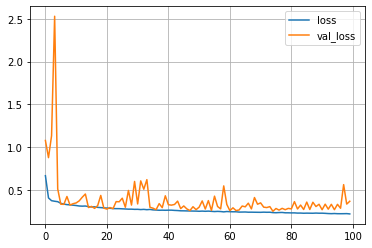

In [34]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [35]:
input_ = keras.layers.Input(shape=(8, ))
x = keras.layers.Dense(30, activation='relu')(input_)
x = keras.layers.Dense(30, activation='relu')(x)
y = keras.layers.Concatenate()([input_, x])
output_ = keras.layers.Dense(1)(y)
model = keras.models.Model(inputs=input_, outputs=output_)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_11[0][0]        

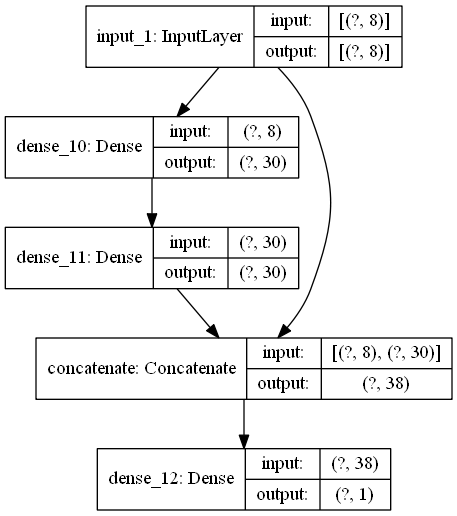

In [36]:
keras.utils.plot_model(model,'model.png', show_shapes=True)

In [56]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()
# model.compile()

In [57]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [58]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [59]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 0s 931us/step - loss: 2.5491 - output_1_loss: 2.4316 - output_2_loss: 3.6071 - val_loss: 2.2609 - val_output_1_loss: 2.1855 - val_output_2_loss: 2.9389
Epoch 2/10
363/363 [==============================] - 0s 681us/step - loss: 0.9824 - output_1_loss: 0.8333 - output_2_loss: 2.3242 - val_loss: 0.8716 - val_output_1_loss: 0.7170 - val_output_2_loss: 2.2626
Epoch 3/10
363/363 [==============================] - 0s 821us/step - loss: 0.8091 - output_1_loss: 0.6924 - output_2_loss: 1.8598 - val_loss: 0.7873 - val_output_1_loss: 0.6431 - val_output_2_loss: 2.0846
Epoch 4/10
363/363 [==============================] - 0s 701us/step - loss: 0.7433 - output_1_loss: 0.6424 - output_2_loss: 1.6517 - val_loss: 0.7370 - val_output_1_loss: 0.6032 - val_output_2_loss: 1.9415
Epoch 5/10
363/363 [==============================] - 0s 745us/step - loss: 0.7005 - output_1_loss: 0.6078 - output_2_loss: 1.5349 - val_loss: 0.6943 - val_output_1_loss: 0.576

In [60]:
model.summary()

Model: "wide_and_deep_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             multiple                  210       
_________________________________________________________________
dense_23 (Dense)             multiple                  930       
_________________________________________________________________
dense_24 (Dense)             multiple                  36        
_________________________________________________________________
dense_25 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


In [17]:
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist.load_data()

In [18]:
(x_train, y_train), (x_test, y_test) = mnist

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train = x_train /255.
x_test = x_test / 255.
x_train, y_train, x_val, y_val = x_train[:50000], y_train[:50000], \
x_train[50000:], y_train[50000:]

In [22]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape 

((50000, 28, 28), (50000,), (10000, 28, 28), (10000,))

In [23]:
input_layer = keras.layers.Input(shape=(28, 28))
x = keras.layers.Flatten()(input_layer)
x = keras.layers.Dense(300, activation='relu')(x)
x = keras.layers.Dense(300, activation='relu')(x)
output_layer = keras.layers.Dense(10, activation='softmax')(x)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
             loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
import os
import time
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [29]:
run_logdir

'.\\my_logs\\run_2021_03_24-19_35_41'

In [30]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train, y_train, epochs=100, 
                   validation_data=(x_val, y_val), callbacks=[tensorboard_cb])

Epoch 1/100
   1/1563 [..............................] - ETA: 0s - loss: 2.3316 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\sinjy\anaconda3\envs\tensorflow_2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6483 - accuracy: 0.8373 - val_loss: 0.3110 - val_accuracy: 0.9135
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3022 - accuracy: 0.9131 - val_loss: 0.2458 - val_accuracy: 0.9303
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2496 - accuracy: 0.9283 - val_loss: 0.2150 - val_accuracy: 0.9384
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2151 - accuracy: 0.9385 - val_loss: 0.1882 - val_accuracy: 0.9486
Epoch 5/100
1563/1563 [===========

In [31]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [32]:
a = [1, 2, 3]
a[:-1]

[1, 2]

# 연습문제 8번.
# cifar10 training

In [5]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10.load_data()

In [6]:
len(cifar10)

2

In [7]:
len(cifar10[0])

2

In [8]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10

In [9]:
x_train_full.shape

(50000, 32, 32, 3)

In [10]:
y_train_full.shape

(50000, 1)

In [38]:
# x_train, x_val = x_train_full[:40000] / 255, x_train_full[40000:] / 255
# y_train, y_val = y_train_full[:40000], y_train_full[40000:]
# x_test = x_test / 255.
x_train, x_val = x_train_full[:40000], x_train_full[40000:]
y_train, y_val = y_train_full[:40000], y_train_full[40000:]

x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)

x_train = (x_train - x_mean) / x_std
x_val = (x_val - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [39]:
x_train.dtype

dtype('float64')

In [40]:
x_train.shape, x_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

## a. 100개의 뉴런을 가진 은닉층 20개로 신경망 만들기( he초기화, elu활성화함수)

### 모델 제작

In [28]:
from functools import partial

NEURONS = 100
HIDDEN = 20
ACTIVATION = 'elu'
INITIALIZER = 'he_normal'

Dense = partial(keras.layers.Dense, units=NEURONS, activation=ACTIVATION,
                                  kernel_initializer=INITIALIZER)

layers_lst = []

layers_lst += [keras.layers.Flatten(input_shape=(32, 32, 3))]
for i in range(HIDDEN):
    layers_lst += [Dense()]
layers_lst += [keras.layers.Dense(10, activation='softmax', 
                                  kernel_initializer=INITIALIZER)]

model = keras.models.Sequential(layers_lst)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1

In [37]:
import os

model_path = "./model"
log_dir = './my_logs'

tensorboard_cb = keras.callbacks.TensorBoard(log_dir=log_dir)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, 
          validation_data=(x_val, y_val), callbacks=[tensorboard_cb])
model.save(os.path.join(model_path, "Deep_model_3_25.h5"))

Epoch 1/100
   1/1250 [..............................] - ETA: 0s - loss: 1.8298 - accuracy: 0.2812WARNING:tensorflow:From C:\Users\sinjy\anaconda3\envs\tensorflow_2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0692 - accuracy: 0.2633 - val_loss: 1.8341 - val_accuracy: 0.3249
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8109 - accuracy: 0.3453 - val_loss: 1.8010 - val_accuracy: 0.3426
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7323 - accuracy: 0.3749 - val_loss: 1.7771 - val_accuracy: 0.3601
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6799 - accuracy: 0.3950 - val_loss: 1.6974 - val_accuracy: 0.3938
Epoch 5/100
1250/1250 [===========

In [38]:
model = keras.models.load_model(os.path.join(model_path, 'Deep_model_3_25.h5'))

In [39]:
model.evaluate(x=x_test, y=y_test, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 70.8810 - accuracy: 0.4017


[70.88101959228516, 0.4016999900341034]

## b. Nadam optimizer, early stopping

In [10]:
log_dir = './my_logs/simple_2'
model_path = './model/model_3_25.h5'

In [14]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=log_dir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,
         validation_data=(x_val, y_val), 
          callbacks=[tensorboard_cb, early_stopping_cb])
model.save(model_path)

Epoch 1/100
   1/1250 [..............................] - ETA: 0s - loss: 1.7801 - accuracy: 0.3438WARNING:tensorflow:From C:\Users\sinjy\anaconda3\envs\tensorflow_2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2423 - accuracy: 0.5652 - val_loss: 1.4738 - val_accuracy: 0.5034
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1910 - accuracy: 0.5789 - val_loss: 1.4717 - val_accuracy: 0.5003
Epoch 3/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1650 - accuracy: 0.5918 - val_loss: 1.4396 - val_accuracy: 0.5116
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1373 - accuracy: 0.6034 - val_loss: 1.4591 - val_accuracy: 0.5076
Epoch 5/100
1250/1250 [======

In [12]:
model = keras.models.load_model(model_path)

In [15]:
model.evaluate(x=x_test, y=y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 178.0827 - accuracy: 0.3344


[178.08274841308594, 0.3343999981880188]

In [20]:
log_dir = './my_logs/batchnorm_2'
model_path = './model/model_3_26.h5'

In [16]:
from functools import partial

NEURONS = 100
HIDDEN = 20
ACTIVATION = 'elu'
INITIALIZER = 'he_normal'

Dense = partial(keras.layers.Dense, units=NEURONS, kernel_initializer=INITIALIZER)

layers_lst = []

layers_lst += [keras.layers.Flatten(input_shape=(32, 32, 3))]
for i in range(HIDDEN):
    layers_lst += [Dense()]
    layers_lst += [keras.layers.BatchNormalization()]
    layers_lst += [keras.layers.Activation(ACTIVATION)]
layers_lst += [keras.layers.Dense(10, activation='softmax', 
                                  kernel_initializer=INITIALIZER)]

model = keras.models.Sequential(layers_lst)

In [21]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=log_dir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,
         validation_data=(x_val, y_val), 
          callbacks=[tensorboard_cb, early_stopping_cb, checkpoint_cb])
# model.save(model_path)

Epoch 1/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9603 - accuracy: 0.6639 - val_loss: 1.4364 - val_accuracy: 0.5237
Epoch 2/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.9392 - accuracy: 0.6725 - val_loss: 1.5152 - val_accuracy: 0.5008
Epoch 3/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.9303 - accuracy: 0.6733 - val_loss: 1.4970 - val_accuracy: 0.5198
Epoch 4/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9189 - accuracy: 0.6789 - val_loss: 1.4939 - val_accuracy: 0.5175
Epoch 5/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.9004 - accuracy: 0.6855 - val_loss: 1.5163 - val_accuracy: 0.5168
Epoch 6/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.8926 - accuracy: 0.6851 - val_loss: 1.4231 - val_accuracy: 0.5337
Epoch 7/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8887 - accuracy: 0.6895 - val_loss: 1

In [24]:
model.evaluate(x=x_test, y=y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 1.5645 - accuracy: 0.5101


[1.5645298957824707, 0.5101000070571899]

## d. selu, 자기정규화(입력 특성 표준화, 르쿤 초기화)

In [39]:
log_dir = './my_logs/selu_4'
model_path = './model/model_3_26.h5'

In [40]:
from functools import partial
keras.backend.clear_session()

NEURONS = 100
HIDDEN = 20
ACTIVATION = 'selu'
INITIALIZER = 'lecun_normal'

Dense = partial(keras.layers.Dense, units=NEURONS, 
                activation=ACTIVATION, kernel_initializer=INITIALIZER)

layers_lst = []

layers_lst += [keras.layers.Flatten(input_shape=(32, 32, 3))]
for i in range(HIDDEN):
    layers_lst += [Dense()]
layers_lst += [keras.layers.Dense(10, activation='softmax', 
                                  kernel_initializer=INITIALIZER)]

model = keras.models.Sequential(layers_lst)

In [41]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=log_dir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.00005), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,
         validation_data=(x_val, y_val), 
          callbacks=[tensorboard_cb, early_stopping_cb, checkpoint_cb])
# model.save(model_path)

Epoch 1/100
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8933 - accuracy: 0.3111 - val_loss: 1.7792 - val_accuracy: 0.3498
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7162 - accuracy: 0.3788 - val_loss: 1.6754 - val_accuracy: 0.3930
Epoch 3/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6403 - accuracy: 0.4124 - val_loss: 1.6801 - val_accuracy: 0.3950
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5819 - accuracy: 0.4315 - val_loss: 1.6054 - val_accuracy: 0.4323
Epoch 5/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5402 - accuracy: 0.4459 - val_loss: 1.6114 - val_accuracy: 0.4247
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5046 - accuracy: 0.4570 - val_loss: 1.5554 - val_accuracy: 0.4488
Epoch 7/100
1149/1250 [==========================>...] - ETA: 0s - loss: 1.4761 - accuracy: 0.4696

KeyboardInterrupt: 

In [32]:
model.evaluate(x=x_test, y=y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 1.4603 - accuracy: 0.4988


[1.4603245258331299, 0.49880000948905945]

## e. alpha dropout, mcdropout

In [41]:
log_dir = './my_logs/alpha_dropout_3'
model_path = './model/model_3_26.h5'

In [42]:
import tensorflow as tf
from tensorflow import keras
from functools import partial
keras.backend.clear_session()

NEURONS = 100
HIDDEN = 20
ACTIVATION = 'selu'
INITIALIZER = 'lecun_normal'

Dense = partial(keras.layers.Dense, units=NEURONS, 
                activation=ACTIVATION, kernel_initializer=INITIALIZER)

layers_lst = []

layers_lst += [keras.layers.Flatten(input_shape=(32, 32, 3))]
for i in range(HIDDEN):
    layers_lst += [keras.layers.AlphaDropout(.1)]
    layers_lst += [Dense()]
layers_lst += [keras.layers.AlphaDropout(.1)]
layers_lst += [keras.layers.Dense(10, activation='softmax', 
                                  kernel_initializer=INITIALIZER)]

model = keras.models.Sequential(layers_lst)

In [43]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=log_dir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,
         validation_data=(x_val, y_val), 
          callbacks=[tensorboard_cb, early_stopping_cb, checkpoint_cb])
# model.save(model_path)

Epoch 1/100
1250/1250 [==============================] - 13s 10ms/step - loss: 2.1810 - accuracy: 0.1908 - val_loss: 2.9838 - val_accuracy: 0.2300
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9937 - accuracy: 0.2402 - val_loss: 6.2338 - val_accuracy: 0.2500
Epoch 3/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9254 - accuracy: 0.2663 - val_loss: 6.8157 - val_accuracy: 0.2859
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8691 - accuracy: 0.2963 - val_loss: 6.5770 - val_accuracy: 0.2866
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8297 - accuracy: 0.3125 - val_loss: 7.5576 - val_accuracy: 0.2969
Epoch 6/100
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7972 - accuracy: 0.3305 - val_loss: 7.3005 - val_accuracy: 0.3294
Epoch 7/100
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7640 - accuracy: 0.3477 - val_loss: 7.4837 

In [44]:
model.evaluate(x=x_test, y=y_test, batch_size=32)

313/313 [==============================] - 0s 2ms/step - loss: 5.7211 - accuracy: 0.1000


[5.721122741699219, 0.10000000149011612]

## mcdropout

In [46]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [47]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout)
    else layer for layer in model.layers
])

In [48]:
mc_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

In [51]:
import numpy as np
def mc_dropout_predict_probas(mc_model, x, n_samples=10):
    y_probas = [mc_model.predict(x) for i in range(n_samples)]
    return np.mean(y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, x, n_samples=10):
    probas = mc_dropout_predict_probas(mc_model, x, n_samples=n_samples)
    return np.argmax(probas, axis=1)

pred = mc_dropout_predict_classes(mc_model, x_test)
# accuracy = np.mean(y_test == pred[:, 0])
# accuracy

In [52]:
pred.shape

(10000,)

In [54]:
y_test.shape

(10000, 1)

In [55]:
accuracy = np.mean(y_test[:, 0] == pred)
accuracy

0.0999

## f. 1사이클스케줄링